In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
## Parameters for Two Well 1-D Potential

epsilon_0 = 5
epsilon_1 = 3
epsilon_2 = 4
sigma = 0.6

## Parameters for Hookian Restraint Potential
k = 2000

min_x = -0.05
max_x = 2.05

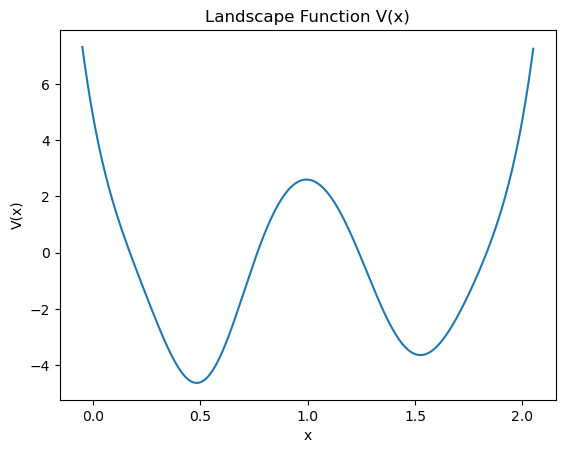

In [27]:
def two_well_1d(x, epsilon_0, epsilon_1, epsilon_2, sigma):
    """
    Defines the landscape function V(x) as described in the image.

    Args:
    x (float or numpy.ndarray): The independent variable.
    epsilon_0 (float): Parameter epsilon_0.
    epsilon_1 (float): Parameter epsilon_1.
    epsilon_2 (float): Parameter epsilon_2.
    sigma (float): Parameter sigma.

    Returns:
    float or numpy.ndarray: The value of the function V(x).
    """

    term1 = 5 * (x - 1)**8
    term2 = epsilon_0 * np.exp((-epsilon_0 * (x - 0.5)**2) / sigma**2)
    term3 = epsilon_1 * np.exp((-epsilon_1 * (x - 1.0)**2) / sigma**2)
    term4 = epsilon_2 * np.exp((-epsilon_2 * (x - 1.5)**2) / sigma**2)

    return term1 - term2 + term3 - term4

def plot_landscape_fxn(V: callable):
    """
    Plots the landscape function V(x) as described in the image.
    """

    x = np.linspace(-0.05, 2.05, 1000)
    y = V(x, epsilon_0, epsilon_1, epsilon_2, sigma)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.title('Landscape Function V(x)')
    plt.show()

plot_landscape_fxn(two_well_1d)

Running Normal MCMC at low temperatures. We hypothesize that simulation will have a difficult time escaping local minima at low temperatures.

In [31]:
T = 50 # K
kB = 1.38064852e-2 # Boltzmann constant (zJ/K)
beta = 1 / (kB * T)
printModulus = 10 # frequency of prints to screen
writeModulus = 10  # frequency of writes to file
dispSize = 0.05
nSweeps = 500000 # number of MC sweeps

In [42]:
def metropolis_hast_mcmc(V):
    samples = np.zeros(nSweeps)

    # pick a random starting point in the window and get potential energy
    # current_x = np.random.uniform(min_x, max_x)
    current_x = 0.5
    current_U = V(current_x, epsilon_0, epsilon_1, epsilon_2, sigma)

    for sweep in range(nSweeps):
        # propose a new position
        proposed_x = current_x + dispSize * np.random.uniform(-1, 1)
        proposed_U = V(proposed_x, epsilon_0, epsilon_1, epsilon_2, sigma)

        # acceptance criterion
        delta_U = proposed_U - current_U
        acceptance_prob = min(0, -beta * delta_U)

        # accept or reject
        if np.log(np.random.uniform()) < acceptance_prob:
            current_x = proposed_x
            current_U = proposed_U

        samples[sweep] = current_x
    
    return samples

samples = metropolis_hast_mcmc(two_well_1d)

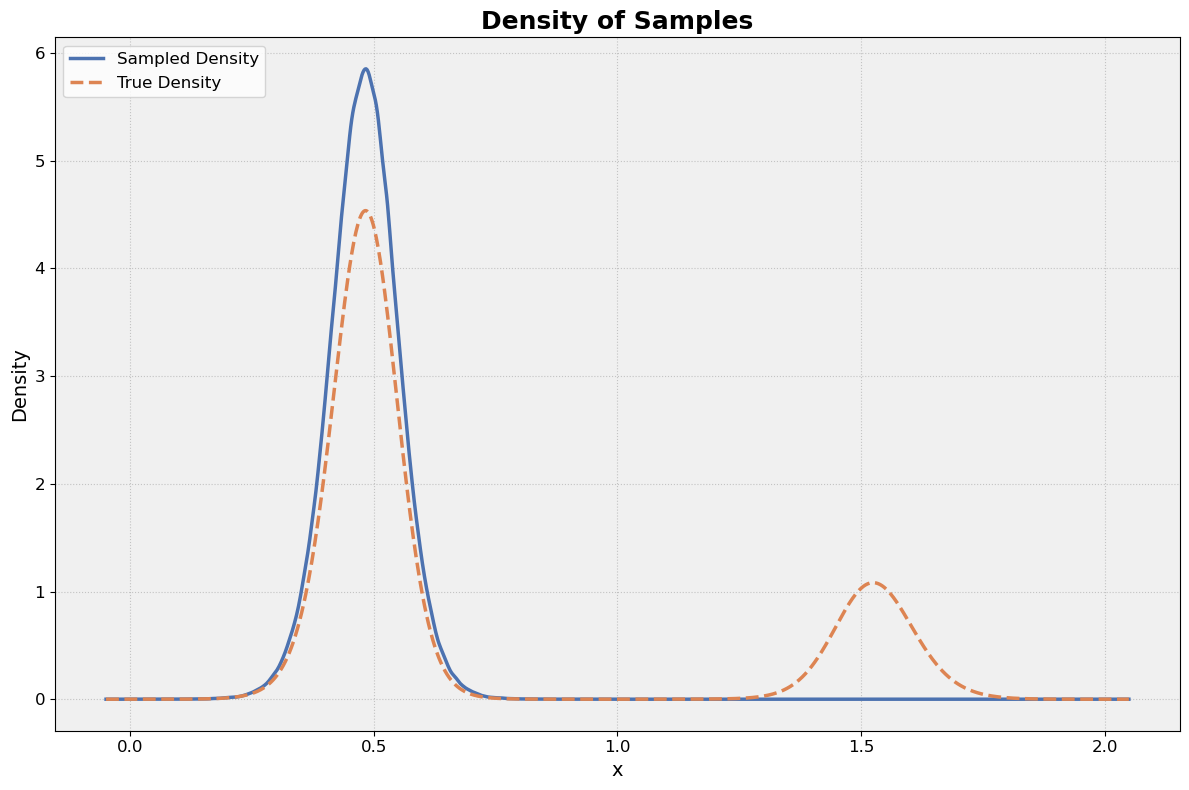

In [43]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_palette("deep")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the sampled density
kde = gaussian_kde(samples)
x_range = np.linspace(min_x, max_x, 1000)  # Increased resolution
density = kde(x_range)
ax.plot(x_range, density, label='Sampled Density', linewidth=2.5)

# Plot the true density
dx = x_range[1] - x_range[0]
true_density = np.exp(-beta * two_well_1d(x_range, epsilon_0, epsilon_1, epsilon_2, sigma))
true_density /= np.sum(true_density) * dx
ax.plot(x_range, true_density, label='True Density', linewidth=2.5, linestyle='--')

# Customize the plot
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Density of Samples', fontsize=18, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a light grid
ax.grid(True, linestyle=':', alpha=0.7)

# Add a subtle background color
ax.set_facecolor('#f0f0f0')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

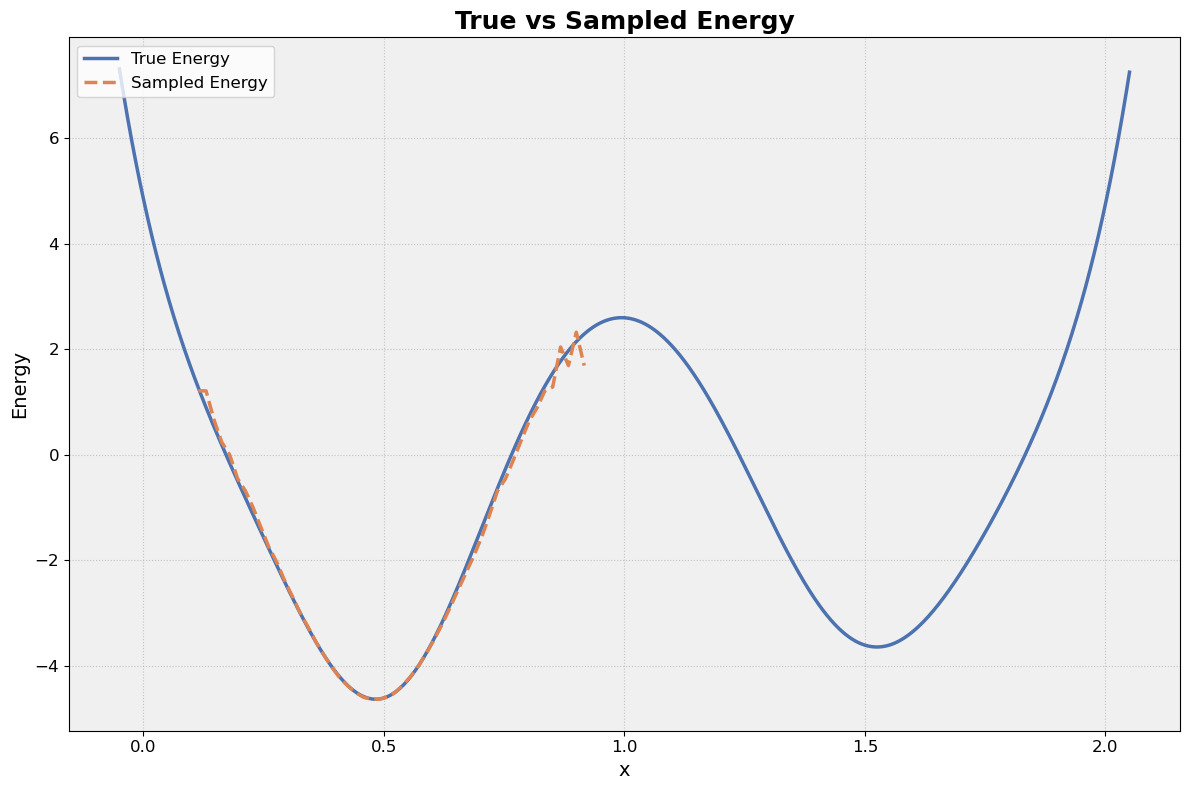

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_palette("deep")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate true energy
x_range = np.linspace(min_x, max_x, 1000)
true_energy = two_well_1d(x_range, epsilon_0, epsilon_1, epsilon_2, sigma)

# Plot true energy
ax.plot(x_range, true_energy, label='True Energy', linewidth=2.5)

# Calculate and plot sampled energy
hist, bin_edges = np.histogram(samples, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
sampled_energy = -np.log(hist) / beta
sampled_energy -= np.min(sampled_energy) - np.min(true_energy) # Align the minimum energy

ax.plot(bin_centers, sampled_energy, label='Sampled Energy', linewidth=2.5, linestyle='--')

# Customize the plot
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Energy', fontsize=14)
ax.set_title('True vs Sampled Energy', fontsize=18, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')

# Adjust tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a light grid
ax.grid(True, linestyle=':', alpha=0.7)

# Add a subtle background color
ax.set_facecolor('#f0f0f0')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
